# Implementing a course recommendation system
Use-Cases:
- To any online edu course platform like Coursera, Udemy etc (They all are having recommendation system on their platform)

## Different way to build a recommendation engine:
- ### Association Rule (mainly used for e-commerce using apriori algorithm with support, lift, and confidence). ex: If you purchase A, you might purchase B and C, etc.

- ### Collaborative Filtering
 - Mainly of two types: 1. User-based similarity and 2. Item-based similarity
 - User-based similarity are good for analysis of past data. Once a new user comes, it will not make any sense as this technique finds the similarity between the two users or multiple users based on "how they have rated a particular movies".
 - Item-based similarity is based on items not on users similarity.
 
- ### Matrix Factorization

- ### Hybrid Recommendation technique



## Data to use: Udemy Course Dataset from Kaggle

## We will be seeing:
- Cosine similarity 
- Linear similarity (much faster)

### Workflow
- Load the data
- Vectorize the dataset
- Finding the cosine similarity matrix
- ID and score
- Recommendation to the user

In [101]:
import pandas as pd
import neattext.functions as nfx # to clean the text-based records

In [102]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

In [103]:
data = pd.read_csv("udemy_courses.csv")

In [104]:
data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


## focus on the "course_title" column.
our center point. 

- Needs to remove the special char, stopwords, etc from the records in that column.

In [105]:
data['course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3673    Learn jQuery from Scratch - Master of JavaScri...
3674    How To Design A WordPress Website With No Codi...
3675                        Learn and Build using Polymer
3676    CSS Animations: Create Amazing Effects on Your...
3677    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3678, dtype: object

In [106]:
data['cleaned_course_title'] = data['course_title'].apply(nfx.remove_stopwords)

In [107]:
data['cleaned_course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow Pra...
2        Financial Modeling Business Analysts Consultants
3            Beginner Pro - Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3673     Learn jQuery Scratch - Master JavaScript library
3674                      Design WordPress Website Coding
3675                                  Learn Build Polymer
3676       CSS Animations: Create Amazing Effects Website
3677            MODX CMS Build Websites: Beginner's Guide
Name: cleaned_course_title, Length: 3678, dtype: object

In [108]:
data['cleaned_course_title'] = data['cleaned_course_title'].apply(nfx.remove_special_characters)

In [109]:
data['cleaned_course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course  Certification  Grow Practice
2        Financial Modeling Business Analysts Consultants
3             Beginner Pro  Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3673      Learn jQuery Scratch  Master JavaScript library
3674                      Design WordPress Website Coding
3675                                  Learn Build Polymer
3676        CSS Animations Create Amazing Effects Website
3677              MODX CMS Build Websites Beginners Guide
Name: cleaned_course_title, Length: 3678, dtype: object

In [110]:
data[['course_title','cleaned_course_title']]

,course_title,cleaned_course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow You...,Complete GST Course Certification Grow Practice
2,Financial Modeling for Business Analysts and C...,Financial Modeling Business Analysts Consultants
3,Beginner to Pro - Financial Analysis in Excel ...,Beginner Pro Financial Analysis Excel 2017
4,How To Maximize Your Profits Trading Options,Maximize Profits Trading Options
...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,Learn jQuery Scratch Master JavaScript library
3674,How To Design A WordPress Website With No Codi...,Design WordPress Website Coding
3675,Learn and Build using Polymer,Learn Build Polymer
3676,CSS Animations: Create Amazing Effects on Your...,CSS Animations Create Amazing Effects Website


## Let's build the count vectorizer matrix

In [111]:
count_vectorization = CountVectorizer()
count_vectorizer_matrix = count_vectorization.fit_transform(data['cleaned_course_title'])

In [112]:
count_vectorizer_matrix

<3678x3559 sparse matrix of type '<class 'numpy.int64'>'
	with 18333 stored elements in Compressed Sparse Row format>

In [113]:
# sparse to dense
count_vectorizer_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

## Let's find the cosine similarity now

In [114]:
cosine_similarity_matrix = cosine_similarity(count_vectorizer_matrix)

In [115]:
cosine_similarity_matrix

array([[1.        , 0.20412415, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20412415, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.23570226],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23570226, 0.        ,
        1.        ]])

In [116]:
cosine_similarity_matrix[0:10]

array([[1.        , 0.20412415, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20412415, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

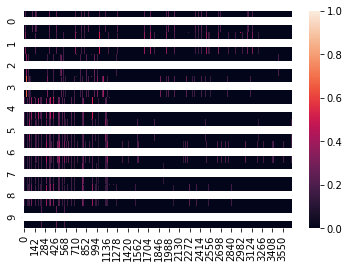

In [118]:
sns.heatmap(cosine_similarity_matrix[0:10], annot = True)

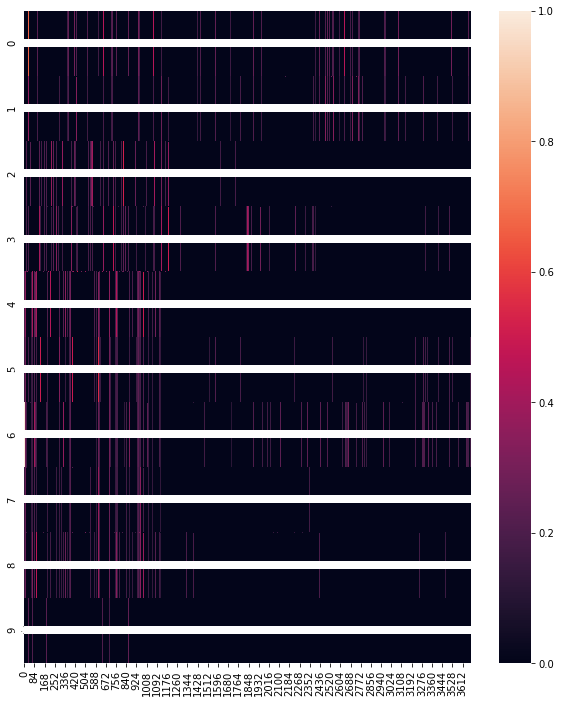

In [119]:
plt.figure(figsize = (10,12))
sns.heatmap(cosine_similarity_matrix[0:10], annot = True)
plt.show()

## Getting the course index

In [120]:
course_index = pd.Series(data.index, index = data['course_title']).drop_duplicates()

In [121]:
course_index

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3673
How To Design A WordPress Website With No Coding At All        3674
Learn and Build using Polymer                                  3675
CSS Animations: Create Amazing Effects on Your Website         3676
Using MODX CMS to Build Websites: A Beginner's Guide           3677
Length: 3678, dtype: int64

In [122]:
course_index['Learn and Build using Polymer']

3675

In [123]:
idx = course_index['Financial Modeling for Business Analysts and Consultants']

In [124]:
scores = list(enumerate(cosine_similarity_matrix[idx]))

In [125]:
scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.9999999999999999),
 (3, 0.18257418583505539),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.19999999999999998),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.25819888974716115),
 (20, 0.0),
 (21, 0.0),
 (22, 0.1690308509457033),
 (23, 0.19999999999999998),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.1690308509457033),
 (36, 0.0),
 (37, 0.19999999999999998),
 (38, 0.36514837167011077),
 (39, 0.0),
 (40, 0.19999999999999998),
 (41, 0.0),
 (42, 0.39999999999999997),
 (43, 0.0),
 (44, 0.0),
 (45, 0.18257418583505539),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.25819888974716115),
 (54, 0.0),
 (55, 0.0),
 (56, 0.22360679774997896),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.14907119849998596),
 (61, 0.18257418583505539),
 (62, 0.0),
 

## get the highest score

In [126]:
sort_scores = sorted(scores, key = lambda x:x[1], reverse = True)

In [127]:
sort_scores

[(2, 0.9999999999999999),
 (119, 0.5163977794943223),
 (140, 0.5163977794943223),
 (822, 0.5163977794943223),
 (806, 0.4472135954999579),
 (829, 0.4472135954999579),
 (1023, 0.4472135954999579),
 (1024, 0.4472135954999579),
 (490, 0.44721359549995787),
 (42, 0.39999999999999997),
 (566, 0.39999999999999997),
 (744, 0.39999999999999997),
 (823, 0.39999999999999997),
 (1073, 0.39999999999999997),
 (1077, 0.39999999999999997),
 (38, 0.36514837167011077),
 (229, 0.36514837167011077),
 (268, 0.36514837167011077),
 (319, 0.36514837167011077),
 (927, 0.36514837167011077),
 (941, 0.36514837167011077),
 (1193, 0.36514837167011077),
 (195, 0.3380617018914066),
 (267, 0.3380617018914066),
 (373, 0.3162277660168379),
 (423, 0.3162277660168379),
 (473, 0.3162277660168379),
 (558, 0.3162277660168379),
 (636, 0.3162277660168379),
 (567, 0.2981423969999719),
 (1135, 0.2981423969999719),
 (1158, 0.2981423969999719),
 (19, 0.25819888974716115),
 (53, 0.25819888974716115),
 (99, 0.25819888974716115),
 (1

In [128]:
#omit number 1 and show top 5 scores
sort_scores[1:6]

[(119, 0.5163977794943223),
 (140, 0.5163977794943223),
 (822, 0.5163977794943223),
 (806, 0.4472135954999579),
 (829, 0.4472135954999579)]

## fetch the course index and name and other details

In [129]:
selected_course_indices = [i[0] for i in sort_scores[1:6]]

In [130]:
selected_course_indices

[119, 140, 822, 806, 829]

In [131]:
data['course_title'].iloc[selected_course_indices]

119                Introduction to Financial Modeling
140                       Intro to Financial Modeling
822                            Financial Modeling 101
806    Financial Modeling for Professionals in 1 Day!
829          Financial Modeling in Excel for Startups
Name: course_title, dtype: object

In [132]:
recommended_results = pd.DataFrame(data['course_title'].iloc[selected_course_indices])

In [133]:
recommended_results

,course_title
119,Introduction to Financial Modeling
140,Intro to Financial Modeling
822,Financial Modeling 101
806,Financial Modeling for Professionals in 1 Day!
829,Financial Modeling in Excel for Startups


In [134]:
selected_course_scores = [i[1] for i in sort_scores[1:6]]

In [135]:
recommended_results['similarity_score'] = selected_course_scores

In [136]:
recommended_results

,course_title,similarity_score
119,Introduction to Financial Modeling,0.516398
140,Intro to Financial Modeling,0.516398
822,Financial Modeling 101,0.516398
806,Financial Modeling for Professionals in 1 Day!,0.447214
829,Financial Modeling in Excel for Startups,0.447214


## Abstract

In [149]:
def recommendation_results(title, num_of_recommendations = 5):
    #ID
    idx = course_index[title]
    
    # search cosine similiarty matrix
    scores = list(enumerate(cosine_similarity_matrix[idx]))
    
    # sort the score
    sort_scores = sorted(scores, key = lambda x:x[1], reverse = True)
    
    # recommendation
    selected_course_indices = [i[0] for i in sort_scores[1:]]
    selected_course_scores = [i[1] for i in sort_scores[1:]]
    
    # result
    result = data['course_title'].iloc[selected_course_indices]
    recommended_results = pd.DataFrame(result)
    recommended_results['similarity_score'] = selected_course_scores
    
    return recommended_results.head(num_of_recommendations)

In [150]:
recommendation_results('Introduction to Financial Modeling')

,course_title,similarity_score
140,Intro to Financial Modeling,0.666667
719,Introduction to Financial Statements,0.666667
822,Financial Modeling 101,0.666667
101,Introduction to Financial Statement Analysis,0.577350
374,Financial Accounting - A Brief Introduction,0.577350
